In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn import metrics


In [148]:
def getDummy(df):
    df_dummy = pd.get_dummies(df,drop_first=True)
    
    return df_dummy

def dropYZ(df):
    df_drop = df.drop(columns=["y","z"],axis=1)
    return df_drop
    
def dropXYZ(df):
    df_drop = df.drop(columns=["x","y","z"],axis=1)
    return df_drop

def standarize(df):
    df_standar = df.set_index("id")
    

def dropPrice(df):
    df_drop = df.drop(columns=["price"],axis=1)
    return df_drop

def toCSV(df,name):
    df.to_csv(f"../outputs/{name}.csv")
    
def indexId(df):
    df_id = df.set_index("id")
    return df_id

def getStandarTrain(df):
    df = indexId(df)
    df = getDummy(df)
    df = dropXYZ(df)
    
    X = dropPrice(df)
    y = df["price"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

In [3]:
# TRAINING dataset
dftr = pd.read_csv("../inputs/diamonds_train.csv")
dftr.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


In [4]:
dftr.shape

(40345, 11)

In [5]:
# TEST dataset
dftt = pd.read_csv("../inputs/diamonds_test.csv")
dftt.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.10,Premium,H,SI2,62.2,58.0,6.69,6.60,4.13
1,1,0.51,Ideal,I,SI1,62.5,57.0,5.07,5.10,3.18
2,2,2.03,Premium,G,SI1,61.9,59.0,8.14,8.09,5.02
3,3,1.21,Premium,F,SI1,60.0,60.0,6.96,6.91,4.16
4,4,0.55,Ideal,F,SI1,61.8,55.0,5.27,5.22,3.24


In [6]:
dftt.shape

(13449, 10)

### OPCIONES



In [7]:
dftt.cut.value_counts()

Ideal        5347
Premium      3445
Very Good    3001
Good         1260
Fair          396
Name: cut, dtype: int64

In [8]:
dftt.color.value_counts()

G    2800
E    2484
F    2387
H    2072
D    1661
I    1313
J     732
Name: color, dtype: int64

In [9]:
dftt.clarity.value_counts()

SI1     3322
VS2     3065
SI2     2266
VS1     2064
VVS2    1217
VVS1     909
IF       427
I1       179
Name: clarity, dtype: int64

In [10]:
dftt.describe()

,id,carat,depth,table,x,y,z
count,13449.00000,13449.000000,13449.000000,13449.000000,13449.000000,13449.000000,13449.000000
mean,6724.00000,0.798023,61.743156,57.484170,5.732387,5.734190,3.540980
std,3882.53622,0.470641,1.436475,2.232334,1.117514,1.109695,0.734237
min,0.00000,0.200000,43.000000,50.100000,0.000000,0.000000,0.000000
25%,3362.00000,0.400000,61.000000,56.000000,4.720000,4.730000,2.910000
50%,6724.00000,0.700000,61.800000,57.000000,5.710000,5.720000,3.530000
75%,10086.00000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,13448.00000,4.500000,73.600000,73.000000,10.230000,10.160000,31.800000


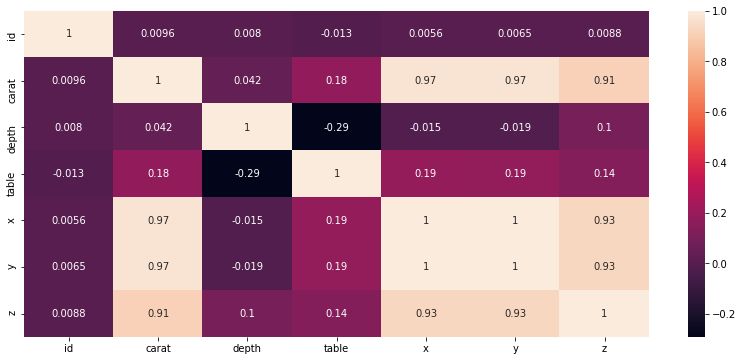

In [11]:
mc = dftt.corr()
plt.figure(figsize=(14,6))
sn.heatmap(mc,annot=True)

## FIRST TEST

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
dftr_first = getDummy(dftr)
X=dftr_first.drop('price',axis=1)
y=dftr_first['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()

model.fit(X_train, y_train)

print(X_test,y_test)

          id  carat  depth  table     x     y     z  cut_Good  cut_Ideal  \
9158    9158   0.53   60.9   57.0  5.23  5.29  3.19         0          1   
34985  34985   0.38   61.6   56.0  4.67  4.72  2.89         0          1   
22672  22672   0.33   63.2   57.0  4.37  4.40  2.77         1          0   
37807  37807   0.46   61.6   54.0  4.97  5.00  3.07         0          1   
25023  25023   0.53   62.7   60.0  5.19  5.12  3.23         0          0   
...      ...    ...    ...    ...   ...   ...   ...       ...        ...   
8518    8518   0.27   62.2   55.0  4.12  4.17  2.58         0          1   
18294  18294   1.52   62.1   55.0  7.41  7.33  4.58         0          1   
16674  16674   0.80   62.4   57.0  5.91  5.83  3.66         0          1   
1822    1822   1.00   62.7   56.0  6.39  6.43  4.02         0          1   
3886    3886   0.41   62.3   55.0  4.78  4.75  2.97         0          1   

       cut_Premium  ...  color_H  color_I  color_J  clarity_IF  clarity_SI1  \
9158    

In [14]:
y_pred = model.predict(X_train)

##sklearn.metrics.r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
r2 = metrics.r2_score(y_train,y_pred)
r2

0.9208866423913198

In [15]:
y_test_pred = model.predict(X_test)

r2_test = metrics.r2_score(y_test,y_test_pred)
r2_test

0.9179435514628201

In [16]:
msre = mean_squared_error(y_test, y_test_pred)
msre

1241030.1805754646

In [17]:
dftt_first = getDummy(dftt)

In [18]:
y_first = model.predict(dftt_first)

In [19]:
dftt_first['price'] = y_first

In [20]:
dftt_first

,id,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,0,1.10,62.2,58.0,6.69,6.60,4.13,0,0,1,...,0,0,0,0,1,0,0,0,0,4662.022175
1,1,0.51,62.5,57.0,5.07,5.10,3.18,0,1,0,...,1,0,0,1,0,0,0,0,0,191.386768
2,2,2.03,61.9,59.0,8.14,8.09,5.02,0,0,1,...,0,0,0,1,0,0,0,0,0,15133.201992
3,3,1.21,60.0,60.0,6.96,6.91,4.16,0,0,1,...,0,0,0,1,0,0,0,0,0,7395.553974
4,4,0.55,61.8,55.0,5.27,5.22,3.24,0,1,0,...,0,0,0,1,0,0,0,0,0,1769.092527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13444,13444,0.30,60.0,58.0,4.37,4.40,2.63,0,0,1,...,0,0,0,0,0,0,1,0,0,551.032868
13445,13445,0.55,60.8,56.0,5.31,5.34,3.24,0,1,0,...,0,0,0,0,0,0,0,0,1,3298.781118
13446,13446,0.23,61.3,58.0,3.94,3.96,2.42,0,0,0,...,0,0,0,0,0,0,0,1,0,829.003290
13447,13447,0.30,61.4,58.0,4.29,4.31,2.64,0,1,0,...,0,0,0,0,0,0,1,0,0,770.343795


In [21]:
dftt_1sub = dftt_first[['id','price']]
dftt_1sub = dftt_1sub.set_index('id')

In [22]:
dftt_1sub

,price
id,
0,4662.022175
1,191.386768
2,15133.201992
3,7395.553974
4,1769.092527
...,...
13444,551.032868
13445,3298.781118
13446,829.003290


In [23]:
dftt_1sub.to_csv("../outputs/d1_s1.csv")

In [24]:
df_res1 = pd.DataFrame()
df_res1["predicc"]=y_test_pred.round(2)
df_res1["test"]=y_test.reset_index(drop=True)
df_res1["diff"]=abs(y_test_pred - y_test.reset_index(drop=True))

In [25]:
df_res1

,predicc,test,diff
0,2946.95,2830,116.953446
1,1934.63,1074,860.628795
2,-464.27,521,985.267339
3,1128.23,983,145.230307
4,2909.82,2514,395.815516
...,...,...,...
8064,1147.09,622,525.089914
8065,9872.45,9176,696.445578
8066,2163.62,2122,41.620895
8067,5835.14,5755,80.138246


In [26]:
dftt_1sub.describe()

,price
count,13449.000000
mean,3926.513512
std,3810.553768
min,-3647.872689
25%,1064.487497
50%,2853.546833
75%,5895.588345
max,34461.428388


,index,price
0,10483,-3647.872689
1,7734,-3549.942051
2,6706,-3383.342942
3,113,-3313.128892
4,1487,-3260.264415


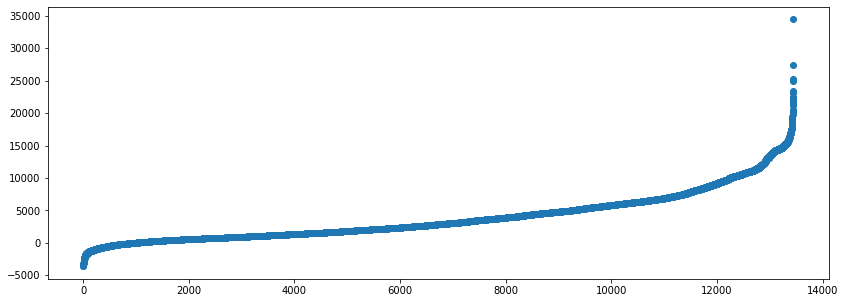

In [27]:
dftt_1sub = dftt_first[['price']].sort_values(by=["price"],ascending=True).reset_index()
display(dftt_1sub.head())
plt.figure(figsize=(14,5))
plt.plot(dftt_1sub["price"],"o")

In [28]:
dftt_1sub[dftt_1sub["price"]<0]

,index,price
0,10483,-3647.872689
1,7734,-3549.942051
2,6706,-3383.342942
3,113,-3313.128892
4,1487,-3260.264415
...,...,...
967,13291,-3.455255
968,7678,-1.462709
969,52,-1.113303
970,1372,-0.552853


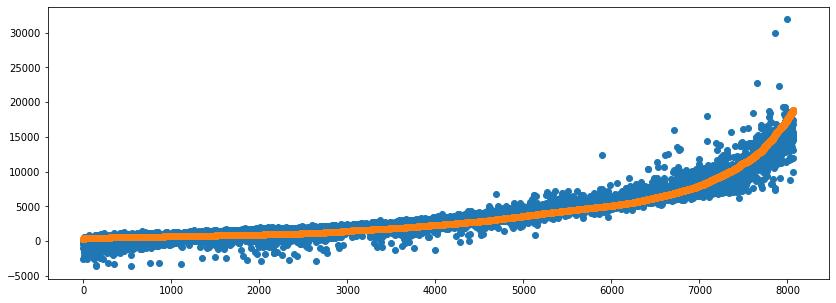

In [29]:
plt.figure(figsize=(14,5))
plt.plot(df_res1[["predicc","test"]].sort_values("test",ascending=True).reset_index(drop=True),"o");

## SECOND TEST

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
df_drop = getDummy(dftr)
df_drop = dropXYZ(df_drop)

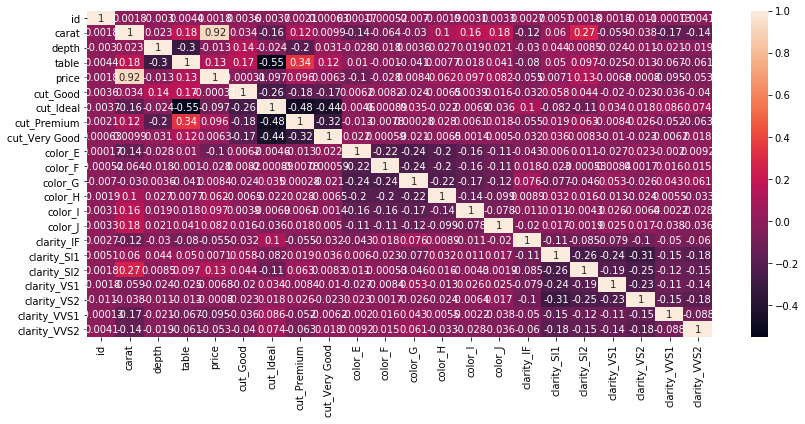

In [32]:
mc = df_drop.corr()
plt.figure(figsize=(14,6))
sn.heatmap(mc,annot=True)

In [33]:
model_rf = RandomForestRegressor(n_estimators=100) 

In [34]:
X=df_drop.drop('price',axis=1)
y=df_drop['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model_rf.fit(X_train, y_train)

print(X_train.shape,y_train.shape)

(32276, 21) (32276,)


In [35]:
y_pred = model_rf.predict(X_train)

##sklearn.metrics.r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
r2 = metrics.r2_score(y_train,y_pred)
r2

0.9963286553038879

In [36]:
y_test_pred = model_rf.predict(X_test)

r2_test = metrics.r2_score(y_test,y_test_pred)
r2_test

0.9740504932492846

In [38]:
dftt_drop = getDummy(dftt)
dftt_drop = dropXYZ(dftt_drop)

print(dftt_drop.shape)
dftt_drop.columns

(13449, 21)


Index(['id', 'carat', 'depth', 'table', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_Very Good', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [39]:
dftt_drop.head()

,id,carat,depth,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1.10,62.2,58.0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1,0.51,62.5,57.0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,2,2.03,61.9,59.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,1.21,60.0,60.0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,4,0.55,61.8,55.0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [40]:
y_second = model_rf.predict(dftt_drop)

print(y_second.shape)

(13449,)


In [41]:
res2 = pd.Series(y_second).sort_values().reset_index(drop=True)

print(res2)

0          364.74
1          370.52
2          370.74
3          370.93
4          371.68
           ...   
13444    17592.90
13445    17597.54
13446    17599.13
13447    17727.14
13448    18171.79
Length: 13449, dtype: float64


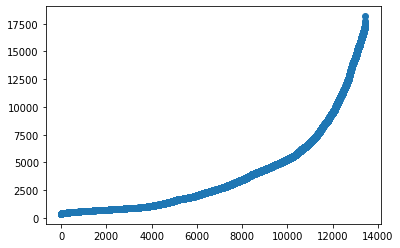

In [42]:
plt.plot(res2,"o")

In [43]:
dftt_drop["price"] = y_second

In [44]:
dftt_2sub = dftt_drop[["id","price"]]
dftt_2sub = dftt_2sub.set_index('id')
dftt_2sub

,price
id,
0,4640.67
1,1063.84
2,17592.90
3,6646.95
4,1517.40
...,...
13444,788.03
13445,2549.20
13446,515.12


In [45]:
dftt_2sub.describe()

,price
count,13449.000000
mean,3943.231851
std,3915.192647
min,364.740000
25%,927.890000
50%,2484.590000
75%,5370.880000
max,18171.790000


In [46]:
toCSV(dftt_2sub,"d3_s1")

In [47]:
df_res2 = pd.DataFrame()
df_res2["predicc"]=y_test_pred.round(2)
df_res2["test"]=y_test.reset_index(drop=True)
df_res2["diff"]=abs(y_test_pred - y_test.reset_index(drop=True))

In [48]:
df_res2

,predicc,test,diff
0,4068.70,4027,41.70
1,1079.21,1030,49.21
2,3101.27,2919,182.27
3,3293.00,3206,87.00
4,1000.06,1031,30.94
...,...,...,...
8064,3445.26,3429,16.26
8065,1328.48,1291,37.48
8066,4353.62,4649,295.38
8067,881.72,1046,164.28


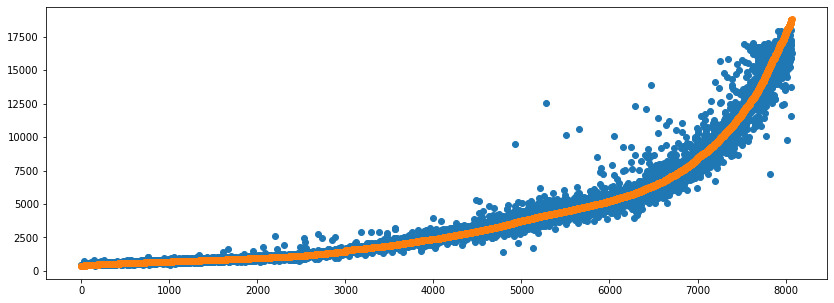

In [49]:
plt.figure(figsize=(14,5))
plt.plot(df_res2[["predicc","test"]].sort_values("test",ascending=True).reset_index(drop=True),"o");

In [50]:
## mean_squared_error(y_true, y_pred, sample_weight=None, multioutput='uniform_average', squared=True)

msre = mean_squared_error(y_test, y_test_pred)

In [51]:
msre

420572.011870777

In [52]:
test2_df = df_res2[["predicc","test"]].sort_values("test",ascending=True).reset_index(drop=True)

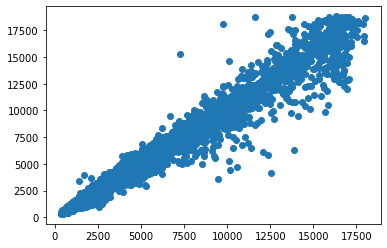

In [53]:
plt.scatter(test2_df["predicc"], test2_df["test"])

## THIRD TEST

In [125]:


dftr_standar = indexId(dftr)
dftr_standar = getDummy(dftr_standar)
dftr_standar = dropXYZ(dftr_standar)



In [126]:





X = dropPrice(dftr_standar)
y = dftr_standar["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [127]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#X_stand = pd.DataFrame(X_stand)

In [128]:
model_st = RandomForestRegressor(n_estimators=500) 

model_st.fit(X_train, y_train)

print(X_train.shape,y_train.shape)

y_pred = model_st.predict(X_train)

##sklearn.metrics.r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
r2 = metrics.r2_score(y_train,y_pred)
print("r2:",r2)

y_test_pred = model_st.predict(X_test)

r2_test = metrics.r2_score(y_test,y_test_pred)
print("r2_test:",r2_test)

(30258, 20) (30258,)
r2: 0.9965164389848095
r2_test: 0.9754267747208096


In [129]:
y_pred = model_st.predict(X_train)

##sklearn.metrics.r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
r2 = metrics.r2_score(y_train,y_pred)
r2

0.9965164389848095

In [130]:
y_test_pred = model_st.predict(X_test)

r2_test = metrics.r2_score(y_test,y_test_pred)
r2_test

0.9754267747208096

In [131]:
dftt_standar = dftt.set_index("id")
dftt_standar = getDummy(dftt_standar)
dftt_standar = dropXYZ(dftt_standar)

#NO HAY QUE HACER FIT EN TEST: NO --> scaler.fit(dftt_standar)

Xtt_scaler = scaler.transform(dftt_standar)

Xtt_scaler = pd.DataFrame(Xtt_scaler)

In [132]:
Xtt_scaler

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.640515,0.306842,0.249809,-0.313709,-0.818398,1.712804,-0.538558,-0.470228,-0.462244,-0.515057,2.351203,-0.336154,-0.231808,-0.189228,-0.559868,2.190610,-0.420318,-0.542335,-0.271762,-0.322716
1,-0.607372,0.516368,-0.198408,-0.313709,1.221899,-0.583838,-0.538558,-0.470228,-0.462244,-0.515057,-0.425314,2.974829,-0.231808,-0.189228,1.786135,-0.456494,-0.420318,-0.542335,-0.271762,-0.322716
2,2.607525,0.097315,0.698027,-0.313709,-0.818398,1.712804,-0.538558,-0.470228,-0.462244,1.941532,-0.425314,-0.336154,-0.231808,-0.189228,1.786135,-0.456494,-0.420318,-0.542335,-0.271762,-0.322716
3,0.873172,-1.229689,1.146244,-0.313709,-0.818398,1.712804,-0.538558,-0.470228,2.163359,-0.515057,-0.425314,-0.336154,-0.231808,-0.189228,1.786135,-0.456494,-0.420318,-0.542335,-0.271762,-0.322716
4,-0.522770,0.027472,-1.094842,-0.313709,1.221899,-0.583838,-0.538558,-0.470228,2.163359,-0.515057,-0.425314,-0.336154,-0.231808,-0.189228,1.786135,-0.456494,-0.420318,-0.542335,-0.271762,-0.322716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13444,-1.051536,-1.229689,0.249809,-0.313709,-0.818398,1.712804,-0.538558,2.126627,-0.462244,-0.515057,-0.425314,-0.336154,-0.231808,-0.189228,-0.559868,-0.456494,-0.420318,1.843877,-0.271762,-0.322716
13445,-0.522770,-0.670950,-0.646625,-0.313709,1.221899,-0.583838,-0.538558,-0.470228,-0.462244,-0.515057,-0.425314,-0.336154,-0.231808,-0.189228,-0.559868,-0.456494,-0.420318,-0.542335,-0.271762,3.098703
13446,-1.199590,-0.321739,0.249809,-0.313709,-0.818398,-0.583838,1.856810,2.126627,-0.462244,-0.515057,-0.425314,-0.336154,-0.231808,-0.189228,-0.559868,-0.456494,-0.420318,-0.542335,3.679691,-0.322716
13447,-1.051536,-0.251897,0.249809,-0.313709,1.221899,-0.583838,-0.538558,-0.470228,-0.462244,-0.515057,-0.425314,-0.336154,-0.231808,-0.189228,-0.559868,-0.456494,-0.420318,1.843877,-0.271762,-0.322716


In [133]:
y_third = model_st.predict(Xtt_scaler)

In [134]:
Xtt_scaler["price"]=y_third

In [135]:
Xtt_scaler

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,price
0,0.640515,0.306842,0.249809,-0.313709,-0.818398,1.712804,-0.538558,-0.470228,-0.462244,-0.515057,...,-0.336154,-0.231808,-0.189228,-0.559868,2.190610,-0.420318,-0.542335,-0.271762,-0.322716,4563.125400
1,-0.607372,0.516368,-0.198408,-0.313709,1.221899,-0.583838,-0.538558,-0.470228,-0.462244,-0.515057,...,2.974829,-0.231808,-0.189228,1.786135,-0.456494,-0.420318,-0.542335,-0.271762,-0.322716,1048.665943
2,2.607525,0.097315,0.698027,-0.313709,-0.818398,1.712804,-0.538558,-0.470228,-0.462244,1.941532,...,-0.336154,-0.231808,-0.189228,1.786135,-0.456494,-0.420318,-0.542335,-0.271762,-0.322716,17072.565200
3,0.873172,-1.229689,1.146244,-0.313709,-0.818398,1.712804,-0.538558,-0.470228,2.163359,-0.515057,...,-0.336154,-0.231808,-0.189228,1.786135,-0.456494,-0.420318,-0.542335,-0.271762,-0.322716,7024.748000
4,-0.522770,0.027472,-1.094842,-0.313709,1.221899,-0.583838,-0.538558,-0.470228,2.163359,-0.515057,...,-0.336154,-0.231808,-0.189228,1.786135,-0.456494,-0.420318,-0.542335,-0.271762,-0.322716,1636.119433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13444,-1.051536,-1.229689,0.249809,-0.313709,-0.818398,1.712804,-0.538558,2.126627,-0.462244,-0.515057,...,-0.336154,-0.231808,-0.189228,-0.559868,-0.456494,-0.420318,1.843877,-0.271762,-0.322716,763.159845
13445,-0.522770,-0.670950,-0.646625,-0.313709,1.221899,-0.583838,-0.538558,-0.470228,-0.462244,-0.515057,...,-0.336154,-0.231808,-0.189228,-0.559868,-0.456494,-0.420318,-0.542335,-0.271762,3.098703,2485.086000
13446,-1.199590,-0.321739,0.249809,-0.313709,-0.818398,-0.583838,1.856810,2.126627,-0.462244,-0.515057,...,-0.336154,-0.231808,-0.189228,-0.559868,-0.456494,-0.420318,-0.542335,3.679691,-0.322716,496.480000
13447,-1.051536,-0.251897,0.249809,-0.313709,1.221899,-0.583838,-0.538558,-0.470228,-0.462244,-0.515057,...,-0.336154,-0.231808,-0.189228,-0.559868,-0.456494,-0.420318,1.843877,-0.271762,-0.322716,716.476157


In [136]:
df_res3 = pd.DataFrame()
df_res3["predicc"]=y_test_pred.round(2)
df_res3["test"]=y_test.reset_index(drop=True)
df_res3["diff"]=(y_test_pred - y_test.reset_index(drop=True))

df_res3.sort_values("diff",ascending=False).head(50)

,predicc,test,diff
2457,15450.38,7802,7648.383600
2153,14181.79,8807,5374.794000
5544,17360.06,12021,5339.055167
4411,15894.61,10716,5178.614000
7678,14222.32,9068,5154.323333
5451,8971.63,3820,5151.631810
3950,11958.22,6821,5137.222800
9949,15952.36,10838,5114.357200
1526,10316.47,5277,5039.469333
9064,12812.70,7840,4972.702000


In [137]:
msre3 = mean_squared_error(y_test, y_test_pred)

In [138]:
msre3

396416.23581693356

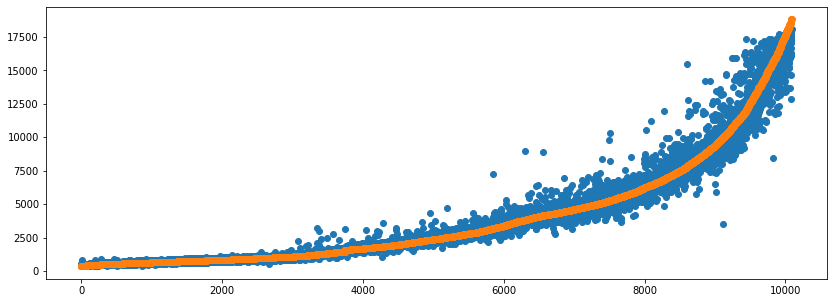

In [139]:
plt.figure(figsize=(14,5))
plt.plot(df_res3[["predicc","test"]].sort_values("test",ascending=True).reset_index(drop=True),"o");

In [140]:
Xtt_scaler = Xtt_scaler[['price']]
Xtt_scaler.index.names = ['id']

In [141]:
Xtt_scaler

,price
id,
0,4563.125400
1,1048.665943
2,17072.565200
3,7024.748000
4,1636.119433
...,...
13444,763.159845
13445,2485.086000
13446,496.480000


In [142]:
toCSV(Xtt_scaler,"d3_s2")

In [143]:
test3_df = df_res3[["predicc","test"]].sort_values("test",ascending=True).reset_index()

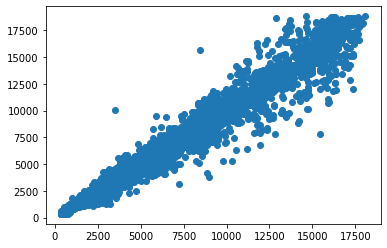

In [144]:
plt.scatter(test3_df["predicc"], test3_df["test"])

In [145]:
predictions = pd.DataFrame()
predictions["model_1"] = y_first
predictions["model_2"] = y_second
predictions["model_3"] = y_third
predictions.head(40)

,model_1,model_2,model_3
0,4662.022175,4640.67,4563.125400
1,191.386768,1063.84,1048.665943
2,15133.201992,17592.90,17072.565200
3,7395.553974,6646.95,7024.748000
4,1769.092527,1517.40,1636.119433
5,2155.879824,2288.07,2281.404000
6,2663.561996,1924.55,1959.741924
7,2357.244410,1847.04,1853.171600
8,4035.442287,3424.55,3543.516000
9,10392.694951,15437.48,14576.632000


# 4 model

In [78]:
from sklearn.linear_model import LassoCV, SGDRegressor 

In [149]:
X_train, X_test, y_train, y_test = getStandarTrain(dftr)

In [158]:
model_lacv = SGDRegressor() 

model_lacv.fit(X_train, y_train)

print(X_train.shape,y_train.shape)

y_pred = model_lacv.predict(X_train)

##sklearn.metrics.r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
r2 = metrics.r2_score(y_train,y_pred)
print("r2:",r2)

y_test_pred = model_lacv.predict(X_test)

r2_test = metrics.r2_score(y_test,y_test_pred)
print("r2_test:",r2_test)

(32276, 20) (32276,)
r2: 0.9157363642056617
r2_test: 0.9177468015445063


In [ ]:
##FAIL!

# 5 model

In [76]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [160]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
def wider_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=20, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))